### **Loading the Dataset**
This code loads the dataset from the CSV file and displays basic information about it.

In [4]:
import pandas as pd

# Load dataset
file_path = "../data/311sr2024.csv"
df = pd.read_csv(file_path)

# View basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282836 entries, 0 to 282835
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   case_enquiry_id                 282836 non-null  int64  
 1   open_dt                         282836 non-null  object 
 2   sla_target_dt                   259854 non-null  object 
 3   closed_dt                       242034 non-null  object 
 4   on_time                         282836 non-null  object 
 5   case_status                     282836 non-null  object 
 6   closure_reason                  282836 non-null  object 
 7   case_title                      282747 non-null  object 
 8   subject                         282836 non-null  object 
 9   reason                          282836 non-null  object 
 10  type                            282836 non-null  object 
 11  queue                           282836 non-null  object 
 12  department      

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,geom_4326,source
0,101005463183,2024-05-14 13:33:28,2024-05-17 04:30:00,2024-05-15 02:58:54,ONTIME,Closed,Case Closed. Closed date : Wed May 15 06:58:54...,Improper Storage of Trash (Barrels),Public Works Department,Code Enforcement,...,East Boston,1,Ward 1,0104,160-162 Liverpool St,2128.0,42.373879,-71.039800,0101000020E610000067D9DA168CC251C0813C8648DB2F...,Citizens Connect App
1,101005463184,2024-05-14 13:33:53,2024-07-22 04:30:00,2024-05-24 12:34:37,ONTIME,Closed,Case Closed. Closed date : Fri May 24 16:34:37...,Graffiti Removal,Property Management,Graffiti,...,Dorchester,7,Ward 16,1604,1660 Dorchester Ave,2122.0,42.293929,-71.061822,0101000020E610000042C2E1E2F4C351C06A7817749F25...,Citizens Connect App
2,101005837387,2024-12-31 02:11:57,2025-01-01 03:30:00,NaN,OVERDUE,Open,,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,West Roxbury,12,Ward 20,2011,416 Belgrade Ave,2132.0,42.285790,-71.149281,0101000020E6100000A24B1DD18DC951C0FDE05CC19424...,Citizens Connect App
3,101005287893,2024-02-07 04:01:41,2024-02-09 04:01:43,2024-02-07 05:48:33,ONTIME,Closed,Case Closed. Closed date : Wed Feb 07 10:48:33...,Improper Storage of Trash (Barrels),Public Works Department,Code Enforcement,...,South End,6,Ward 5,0501,3 Saint Charles St,2116.0,42.347130,-71.071811,0101000020E61000007395138B98C451C03EAD9FBD6E2C...,Citizens Connect App
4,101005331785,2024-02-28 08:06:00,2024-02-29 08:06:25,2024-03-04 09:07:57,OVERDUE,Closed,Case Closed. Closed date : 2024-03-04 14:07:57...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,Dorchester,9,Ward 17,1708,47 Torrey St,2124.0,42.287380,-71.073564,0101000020E6100000AE634444B5C451C03EDE5DDAC824...,Constituent Call


### **Cleaning the Dataset**
This section cleans the data by dropping missing values and handling empty fields.

In [ ]:
import pandas as pd

def clean_data(filepath):
    df = pd.read_csv(filepath)

    # Convert dates to datetime format
    df['open_dt'] = pd.to_datetime(df['open_dt'])
    df['closed_dt'] = pd.to_datetime(df['closed_dt'], errors='coerce')

    # Remove unnecessary columns
    columns_to_drop = ['submitted_photo', 'closed_photo', 'geom_4326']
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    # Handle missing values
    df.dropna(subset=['latitude', 'longitude'], inplace=True)

    # Filter for animal-related complaints
    df = df[df['type'] == "Animal Generic Request"]

    return df

cleaned_df = clean_data("../data/311sr2024.csv")
cleaned_df.to_csv("../data/processed_data.csv", index=False)

### **Filtering for Animal-Related Complaints**
Here, we extract only the records that are related to animal complaints.

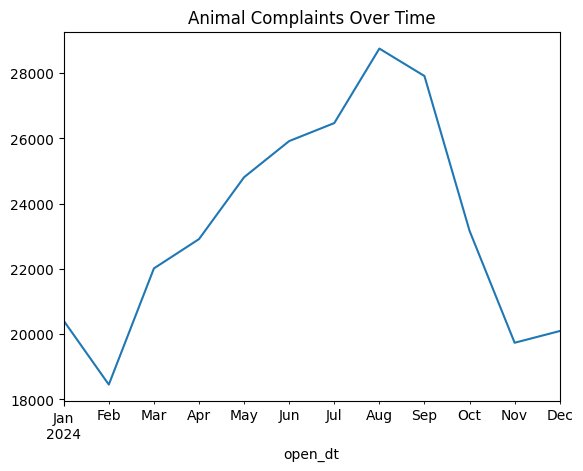

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_trends(filepath):
    df = pd.read_csv(filepath, parse_dates=['open_dt'])
    df.set_index('open_dt', inplace=True)

    # Count complaints per month
    df.resample('ME').size().plot(title="Animal Complaints Over Time")
    plt.show()

# Run the function
plot_trends("../data/processed_data.csv")

### **Geographical Clustering of Complaints**
This code applies **K-Means clustering** to group complaint locations based on latitude and longitude, helping identify geographic hotspots for animal-related complaints.

1. **Loading and Preparing Data**  
   - Reads the dataset and extracts latitude and longitude values while dropping missing data.
   
2. **Applying K-Means Clustering**  
   - Uses the `KMeans` algorithm to classify complaint locations into a specified number of clusters (`num_clusters`).
   - Assigns each complaint to a cluster.

3. **Saving the Clustered Data**  
   - The dataset, now with an added `cluster` column, is saved as `clustered_data.csv` for further analysis.

4. **Visualizing the Clusters**  
   - A scatter plot is generated to visualize how complaints are grouped geographically.
   - Each cluster is displayed in a different color, helping to identify high-density complaint areas.

This analysis allows for better understanding of complaint distribution patterns and potential problem areas in the city.

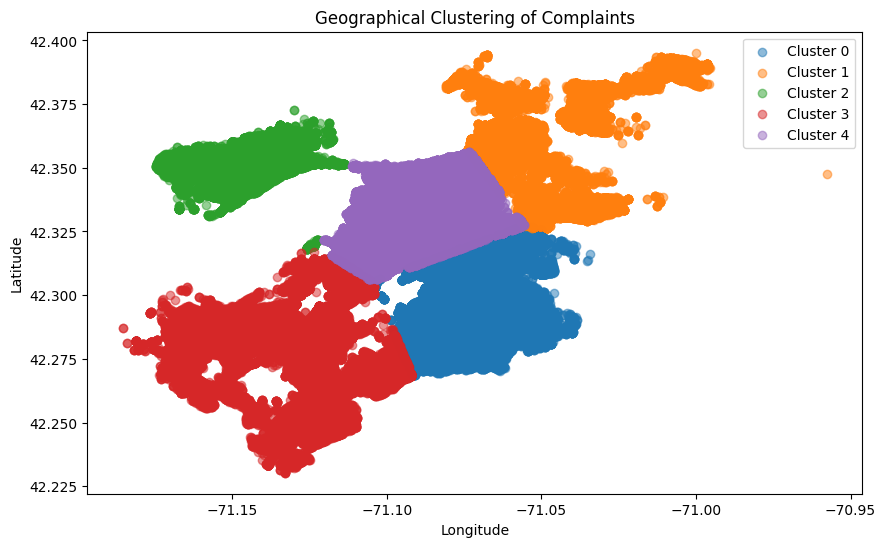

In [7]:
from sklearn.cluster import KMeans

def cluster_locations(filepath, num_clusters=5):
    df = pd.read_csv(filepath)
    coords = df[['latitude', 'longitude']].dropna()

    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(coords)
    df['cluster'] = kmeans.labels_

    return df

# Run the function
clustered_df = cluster_locations("../data/processed_data.csv")
clustered_df.to_csv("../data/clustered_data.csv", index=False)

def plot_clusters(df, num_clusters=5):
    plt.figure(figsize=(10, 6))
    for i in range(num_clusters):
        cluster_data = df[df["cluster"] == i]
        plt.scatter(cluster_data["longitude"], cluster_data["latitude"], label=f"Cluster {i}", alpha=0.5)
    
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Geographical Clustering of Complaints")
    plt.legend()
    plt.show()

# Run the plot function
plot_clusters(clustered_df)

### **Identifying Geographic Hotspots**
This section maps complaint locations using latitude and longitude data.

In [9]:
import folium
from folium.plugins import HeatMap

def generate_heatmap(filepath):
    df = pd.read_csv(filepath)
    m = folium.Map(location=[42.36, -71.05], zoom_start=12)

    heat_data = [[row['latitude'], row['longitude']] for _, row in df.iterrows()]
    HeatMap(heat_data).add_to(m)

    m.save("../reports/heatmap.html")

# Run the function
generate_heatmap("../data/processed_data.csv")